In [2]:
import pymc as pm
import arviz as az

from scipy.stats import beta, gamma
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
from pytensor import tensor as pt 

## 6.1 Exam Scores

在考试成绩中，我们假定有两组人：
- 坏学生：正确率是50%的随机水平
- 好学生：正确率高，但是是需要拟合的参数
- 组别用一个隐变量编码

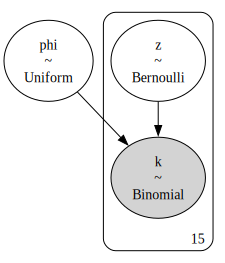

In [9]:
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
with pm.Model() as ExamScores:
    n_question, psi = 40, 0.5
    phi = pm.Uniform('phi', lower = 0.5, upper = 1)
    z = pm.Bernoulli('z', p = 0.5, shape = len(score))
    theta = pm.math.switch(z, phi, psi)
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
pm.model_to_graphviz(ExamScores)



In [10]:
# Exercise 6.1.1
## 基本可以确定，有5个坏学生，10个好学生，好学生正确率[0.832, 0.896]
## 报错是因为太确定了，算不了r_hat
with ExamScores:
    trace = pm.sample(2000)
az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + nu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.016,0.000,0.000,0.000,0.008,4004.0,4004.0,1.0
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[4],0.000,0.011,0.000,0.000,0.000,0.006,8016.0,8016.0,1.0
z[5],0.993,0.082,1.000,1.000,0.001,0.007,5417.0,8000.0,1.0
z[6],0.995,0.071,1.000,1.000,0.001,0.006,6431.0,8000.0,1.0
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


In [11]:
# Exercise 6.1.3
## 加了一个28分的介于好坏之间学生，难以进行分类
## phi降低了一点，[0.821, 0.891]
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35, 28])
with pm.Model() as ExamScores:
    n_question, psi = 40, 0.5
    phi = pm.Uniform('phi', lower = 0.5, upper = 1)
    z = pm.Bernoulli('z', p = 0.5, shape = len(score))
    theta = pm.math.switch(z, phi, psi)
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
    trace = pm.sample(2000)
az.summary(trace)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + nu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[4],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[5],0.995,0.068,1.000,1.000,0.001,0.006,6456.0,8000.0,1.0
z[6],0.994,0.076,1.000,1.000,0.001,0.007,5551.0,8000.0,1.0
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


In [12]:
# Exercise 6.1.3
## 更多的不好不差，他们作为集体被归到好学生里了
## phi的估计变化了很多 [0.788,0.861]，主要是28的影响
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35, 28, 28, 28, 28])
with pm.Model() as ExamScores:
    n_question, psi = 40, 0.5
    phi = pm.Uniform('phi', lower = 0.5, upper = 1)
    z = pm.Bernoulli('z', p = 0.5, shape = len(score))
    theta = pm.math.switch(z, phi, psi)
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
    trace = pm.sample(2000)
az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + nu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.016,0.000,0.000,0.000,0.006,8016.0,8016.0,1.0
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.022,0.000,0.000,0.000,0.007,5342.0,5342.0,1.0
z[3],0.000,0.019,0.000,0.000,0.000,0.010,2672.0,2672.0,1.0
z[4],0.001,0.032,0.000,0.000,0.001,0.008,3571.0,3571.0,1.0
z[5],0.998,0.047,1.000,1.000,0.001,0.006,6576.0,8000.0,1.0
z[6],0.997,0.052,1.000,1.000,0.001,0.006,5894.0,8000.0,1.0
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.016,1.000,1.000,0.000,0.006,8018.0,8000.0,1.0
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


In [13]:
# Exercise 6.1.4
## phi的先验改成0-1之间对结果没有影响
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35])
with pm.Model() as ExamScores:
    n_question, psi = 40, 0.5
    phi = pm.Uniform('phi', lower = 0, upper = 1)
    z = pm.Bernoulli('z', p = 0.5, shape = len(score))
    theta = pm.math.switch(z, phi, psi)
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
    trace = pm.sample(2000)
az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 34 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + nu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[4],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[5],0.993,0.081,1.000,1.000,0.001,0.007,5523.0,8000.0,1.0
z[6],0.991,0.092,1.000,1.000,0.001,0.007,5235.0,8000.0,1.0
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


In [15]:
# Exercise 6.1.5
## z的先验改成0.9，认为有更多的好学生,倾向于判断更多好学生
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35, 28])
with pm.Model() as ExamScores:
    n_question, psi = 40, 0.5
    phi = pm.Uniform('phi', lower = 0.5, upper = 1)
    z = pm.Bernoulli('z', p = 0.9, shape = len(score))
    theta = pm.math.switch(z, phi, psi)
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
    trace = pm.sample(2000)
az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + nu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.011,0.000,0.000,0.000,0.006,8016.0,8016.0,1.0
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[4],0.001,0.032,0.000,0.000,0.000,0.007,5345.0,5345.0,1.0
z[5],1.000,0.011,1.000,1.000,0.000,0.006,8016.0,8000.0,1.0
z[6],1.000,0.022,1.000,1.000,0.000,0.006,8022.0,8000.0,1.0
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


## 6.2 Exam Score with Individual differences

隐变量混合模型是不收敛的重灾区，需要进行收敛性检验

Notes: 
- 收敛性检验$\hat r$：1代表不同链（chain）之间完全收敛，1-1.1是可以接受的，1.1以上是有重大嫌疑的
- 收敛性改进：增大每条链sample数量（draws），增加预热（tune），瘦化数据（thin）


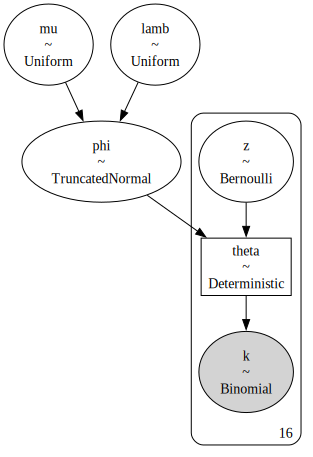

In [22]:
# 增加一个正确率的扰动
## 进一步的修改是，gamma分布的先验似乎不是很靠谱，改成Uniform之后好了很多
# pm.math是不会创建节点的，但是套一个deterministic的壳就可以了
score = np.array([21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35, 28])
with pm.Model() as ExamScoresDiff:
    n_question, psi = 40, 0.5
    mu = pm.Uniform('mu', lower = 0.5, upper = 1)
    lamb = pm.Uniform('lamb', lower = 0, upper = 0.25)
    phi = pm.TruncatedNormal('phi', mu = mu, sigma = lamb, lower = 0, upper = 1)
    z = pm.Bernoulli('z', p = 0.5, shape = len(score))
    theta = pm.Deterministic('theta', pm.math.switch(z, phi, psi))
    k = pm.Binomial('k', n = n_question, p = theta, observed = score)
pm.model_to_graphviz(ExamScoresDiff)


In [23]:
# Exercise 6.2.1
with ExamScoresDiff: 
   trace = pm.sample(2000)
az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, lamb, phi]
>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
There were 370 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid valu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[1],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[2],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
z[4],0.000,0.016,0.000,0.000,0.000,0.008,4004.0,4004.0,1.00
z[5],0.996,0.064,1.000,1.000,0.001,0.007,5730.0,8000.0,1.00
z[6],0.994,0.077,1.000,1.000,0.001,0.007,5320.0,8000.0,1.00
z[7],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[8],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[9],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN


In [27]:
# Exercise 6.2.2
with ExamScoresDiff: 
    post_prod = pm.sample_posterior_predictive(trace, var_names=['theta'])
az.summary(post_prod)

Sampling: []


Output()

/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/stats.py:1359: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[0],0.500,0.000,0.500,0.500,0.000,NaN,8000.0,8000.0,NaN
theta[1],0.500,0.000,0.500,0.500,0.000,NaN,8000.0,8000.0,NaN
theta[2],0.500,0.000,0.500,0.500,0.000,NaN,8000.0,8000.0,NaN
theta[3],0.500,0.000,0.500,0.500,0.000,NaN,8000.0,8000.0,NaN
theta[4],0.500,0.005,0.500,0.500,0.000,0.003,4008.0,4004.0,1.0
theta[5],0.854,0.029,0.820,0.889,0.000,0.002,2150.0,2400.0,1.0
theta[6],0.853,0.033,0.820,0.890,0.001,0.002,2111.0,2454.0,1.0
theta[7],0.856,0.018,0.821,0.889,0.000,0.000,2054.0,2275.0,1.0
theta[8],0.856,0.018,0.821,0.889,0.000,0.000,2054.0,2275.0,1.0
theta[9],0.856,0.018,0.821,0.889,0.000,0.000,2054.0,2275.0,1.0


## 6.3 Twenty Question

这个看上去是最最常见的问题，如果不同的人做了不同的题，如何分开评价题（的难度）和人（的水平）
- 这个问题和前面的Repeated Measure of IQ有点像


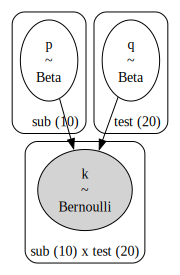

In [49]:
coords = {'sub': np.arange(1, 11), 'test': np.arange(1, 21)}
data = np.array([
    [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],  # Person 1
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 2
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Person 3
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 4
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # Person 5
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],  # Person 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 8
    [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],  # Person 9
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # Person 10
])
with pm.Model(coords=coords) as TwentyQuestion:
    p = pm.Beta('p', alpha = 1, beta = 1, dims = 'sub')
    q = pm.Beta('q', alpha = 1, beta = 1, dims = 'test')
    theta = pm.math.matmul(p[:, np.newaxis], q[np.newaxis, :])
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ('sub', 'test'))
pm.model_to_graphviz(TwentyQuestion)

In [50]:
with TwentyQuestion:
    trace = pm.sample(2000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, q]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


In [53]:
# Exercise 6.3.1
## 好孩子：1,5,6，9；中孩子：10，3，4；坏孩子：2，7，8
az.summary(trace, var_names='p')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[1],0.890,0.096,0.709,1.000,0.001,0.001,9184.0,4728.0,1.0
p[2],0.275,0.140,0.043,0.530,0.001,0.002,10807.0,5731.0,1.0
p[3],0.473,0.169,0.165,0.786,0.002,0.002,11245.0,5171.0,1.0
p[4],0.358,0.154,0.088,0.643,0.002,0.002,10692.0,5983.0,1.0
p[5],0.845,0.119,0.626,1.000,0.001,0.001,8659.0,4341.0,1.0
p[6],0.823,0.124,0.609,1.000,0.001,0.001,5769.0,3173.0,1.0
p[7],0.177,0.115,0.004,0.388,0.001,0.001,10886.0,5281.0,1.0
p[8],0.091,0.087,0.000,0.249,0.001,0.002,13771.0,4973.0,1.0
p[9],0.724,0.158,0.457,0.999,0.002,0.002,7116.0,3140.0,1.0
p[10],0.477,0.171,0.177,0.800,0.002,0.002,8886.0,4248.0,1.0


In [54]:
# Exercise 6.3.1
## 特别简单的题目：1，3，7，8，10，13，
## 特别困难的题目：5，9，11，14，15，17，19
## 交叉检查，69都只有一个人做对，但是6只有一个0.358做对，9有一个0.845做对，所以6更简单
az.summary(trace, var_names='q')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
q[1],0.732,0.178,0.419,1.000,0.002,0.002,8873.0,3935.0,1.0
q[2],0.698,0.181,0.390,1.000,0.002,0.002,9299.0,4183.0,1.0
q[3],0.771,0.161,0.483,1.000,0.002,0.002,8358.0,4197.0,1.0
q[4],0.648,0.204,0.308,0.999,0.002,0.002,8167.0,4057.0,1.0
q[5],0.153,0.138,0.000,0.408,0.001,0.002,10203.0,4380.0,1.0
q[6],0.312,0.182,0.013,0.636,0.002,0.002,11404.0,5727.0,1.0
q[7],0.748,0.161,0.466,1.000,0.001,0.002,9829.0,4356.0,1.0
q[8],0.817,0.145,0.549,1.000,0.001,0.002,10991.0,4822.0,1.0
q[9],0.286,0.173,0.014,0.601,0.002,0.002,10994.0,5260.0,1.0
q[10],0.853,0.124,0.623,1.000,0.001,0.002,9382.0,3905.0,1.0


/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/pymc/model/core.py:1288: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/pymc/model/core.py:1302: ImputationWarning: Data in k contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


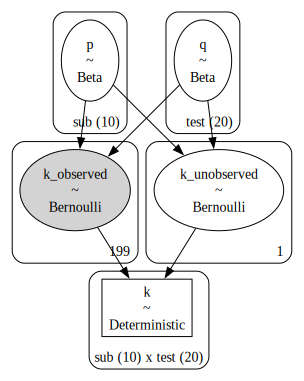

In [61]:
# Exercise 6.3.2
## 看上去pymc能自动处理
coords = {'sub': np.arange(1, 11), 'test': np.arange(1, 21)}
data = np.array([
    [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],  # Person 1
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 2
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Person 3
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 4
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # Person 5
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],  # Person 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 7
    [0, 0, 0, 0, np.nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Person 8
    [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],  # Person 9
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]   # Person 10
])
with pm.Model(coords=coords) as TwentyQuestionNan:
    p = pm.Beta('p', alpha = 1, beta = 1, dims = 'sub')
    q = pm.Beta('q', alpha = 1, beta = 1, dims = 'test')
    theta = pm.math.matmul(p[:, np.newaxis], q[np.newaxis, :])
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ('sub', 'test'))
pm.model_to_graphviz(TwentyQuestion)

In [62]:
with TwentyQuestionNan:
    trace = pm.sample()
    post = pm.sample_posterior_predictive(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, q]
>BinaryGibbsMetropolis: [k_unobserved]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.
Sampling: [k_observed]


Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k_unobserved[0],0.014,0.12,0.0,0.0,0.002,0.009,3112.0,3112.0,1.0


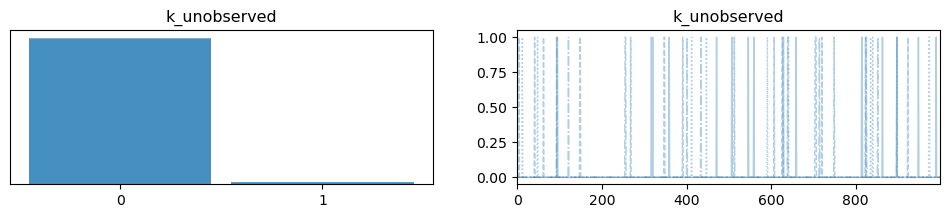

In [70]:
# 可以自动填补缺失值
az.plot_trace(trace, var_names='k_unobserved')
az.summary(trace, var_names='k_unobserved')

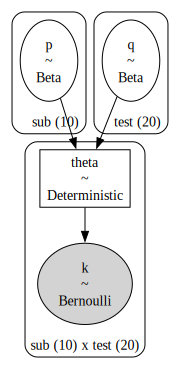

In [57]:
## Exercise 6.3.3
with pm.Model(coords=coords) as TwentyQuestionExp:
    p = pm.Beta('p', alpha = 1, beta = 1, dims = 'sub')
    q = pm.Beta('q', alpha = 1, beta = 1, dims = 'test')
    exppq = pm.math.exp(p[:, np.newaxis] - q[np.newaxis, :])
    theta = pm.Deterministic('theta', exppq/(1 + exppq), dims = ('sub', 'test'))
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ('sub', 'test'))
pm.model_to_graphviz(TwentyQuestion)

In [58]:
with TwentyQuestionExp:
    trace = pm.sample(2000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, q]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.


In [59]:
## 好孩子：1,5,6，9；中孩子：10，3，4；坏孩子：2，7，8
## 特别简单的题目：1，3，7，8，10，13，
## 特别困难的题目：5，9，11，14，15，17，19
## 交叉检查，69都只有一个人做对，但是6只有一个0.358做对，9有一个0.845做对，所以6更难
## 仔细的比较，结果是不一样的
az.summary(trace, var_names = ['p', 'q'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[1],0.547,0.263,0.114,0.999,0.002,0.002,13229.0,5226.0,1.0
p[2],0.156,0.143,0.000,0.422,0.001,0.002,11536.0,4458.0,1.0
p[3],0.209,0.177,0.000,0.540,0.002,0.002,13724.0,4944.0,1.0
p[4],0.182,0.165,0.000,0.494,0.002,0.002,10926.0,4474.0,1.0
p[5],0.476,0.268,0.025,0.929,0.002,0.002,11507.0,5078.0,1.0
p[6],0.474,0.262,0.028,0.918,0.002,0.003,13411.0,5067.0,1.0
p[7],0.140,0.132,0.000,0.385,0.001,0.002,12066.0,4632.0,1.0
p[8],0.125,0.119,0.000,0.348,0.001,0.002,11801.0,4586.0,1.0
p[9],0.344,0.241,0.000,0.788,0.002,0.003,10747.0,4877.0,1.0
p[10],0.208,0.175,0.000,0.539,0.002,0.002,14235.0,5106.0,1.0


## 6.4 Two Country Quiz

假设有T国和M国的题目，让T，M两国人回答
- 人做自己国家的题目正确率高，做别人国家的题目正确率低

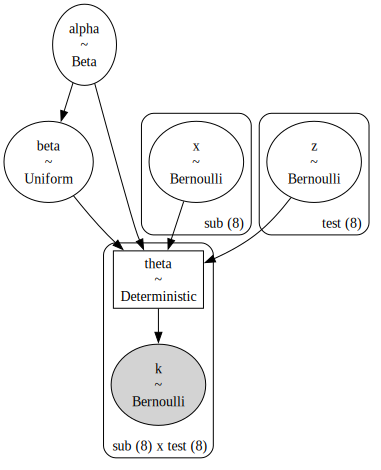

In [3]:
data = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 1
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 2
    [0, 1, 1, 0, 0, 1, 0, 0],  # Person 3
    [0, 1, 1, 0, 0, 1, 1, 0],  # Person 4
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 5
    [0, 0, 0, 1, 1, 0, 0, 1],  # Person 6
    [0, 1, 0, 0, 0, 1, 1, 0],  # Person 7
    [0, 1, 1, 1, 0, 1, 1, 0],  # Person 8
])
coords = {'sub': np.arange(1, 9), 'test': np.arange(1, 9)}

with pm.Model(coords = coords) as TwoCountryQuiz:

    alpha = pm.Beta('alpha', alpha = 1, beta = 2)
    beta = pm.Uniform('beta', lower = 0, upper = alpha)

    x = pm.Bernoulli('x', p = np.array([1] + [0.5] * (data.shape[0] - 1)), dims = 'sub')
    z = pm.Bernoulli('z', p = 0.5, dims = 'test')
    theta = pm.Deterministic('theta', pt.switch(pt.eq(x[:, np.newaxis], z[np.newaxis, :]), alpha, beta), dims = ['sub', 'test'])
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ['sub', 'test'])
pm.model_to_graphviz(TwoCountryQuiz)

In [102]:
with TwoCountryQuiz:
    trace = pm.sample(2000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [alpha, beta]
>BinaryGibbsMetropolis: [x, z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [103]:
# Exercise 6.4.1
## alpha = 0.853, [0.743, 0.953], beta = 0.058, [0.002, 0.128] 答自己国家的题比别人国家的正确率就是高很多
## x1，x2, x5, x6是一个国家，z1, z4, z5, z8是他们国家的题目
az.summary(trace, var_names = ['alpha', 'beta', 'x', 'z'])

/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.853,0.058,0.743,0.953,0.001,0.001,6335.0,4817.0,1.0
beta,0.058,0.039,0.002,0.128,0.000,0.001,6136.0,4455.0,1.0
x[1],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[2],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[3],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
x[4],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
x[5],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[6],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[7],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
x[8],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN


In [5]:
# Exercise 6.4.2
## 我们不用tricky的alpha>beta，会发生很糟糕的事情
with pm.Model(coords = coords) as TwoCountryQuiz:
    alpha = pm.Beta('alpha', alpha = 1, beta = 1)
    beta = pm.Uniform('beta', lower = 0, upper = 1)
    x = pm.Bernoulli('x', p = np.array([1] + [0.5] * (data.shape[0] - 1)), dims = 'sub')
    z = pm.Bernoulli('z', p = 0.5, dims = 'test')
    theta = pm.Deterministic('theta', pt.switch(pt.eq(x[:, np.newaxis], z[np.newaxis, :]), alpha, beta), dims = ['sub', 'test'])
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ['sub', 'test'])
    trace = pm.sample(2000)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [alpha, beta]
>BinaryGibbsMetropolis: [x, z]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

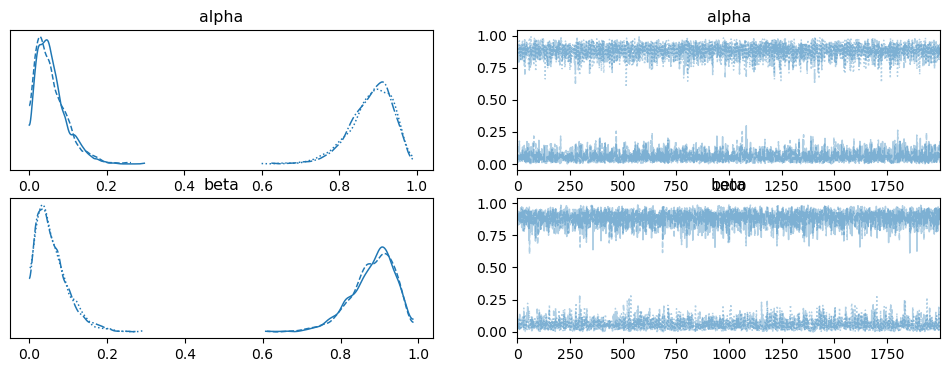

In [10]:
# 其实结果是一样的，我们需要人为的告诉谁是谁
# 这和我们要告诉模型，第一个人一定是泰国人是一样的
az.plot_trace(trace, var_names= ['alpha', 'beta'])

/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/pymc/model/core.py:1288: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/pymc/model/core.py:1302: ImputationWarning: Data in k contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [alpha, beta]
>BinaryGibbsMetropolis: [x, z, k_unobserved]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 32 seconds.
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


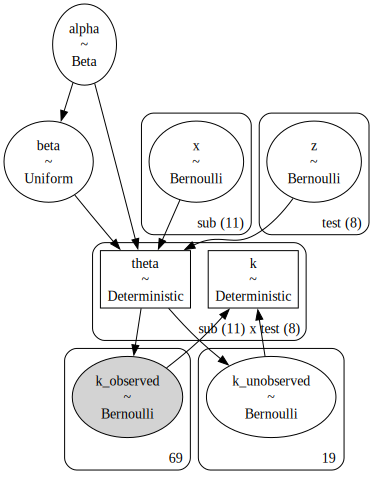

In [19]:
# Exercise 6.4.3
data = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 1
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 2
    [0, 1, 1, 0, 0, 1, 0, 0],  # Person 3
    [0, 1, 1, 0, 0, 1, 1, 0],  # Person 4
    [1, 0, 0, 1, 1, 0, 0, 1],  # Person 5
    [0, 0, 0, 1, 1, 0, 0, 1],  # Person 6
    [0, 1, 0, 0, 0, 1, 1, 0],  # Person 7
    [0, 1, 1, 1, 0, 1, 1, 0],  # Person 8
    [1, 0, 0, 1, np.nan, np.nan, np.nan, np.nan],  # Late Person 1
    [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],  # Late Person 2
    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]  # Late Person 3
])

coords = {'sub': [1, 2, 3, 4, 5, 6, 7, 8, 101, 102, 103], 'test': np.arange(1, 9)}
with pm.Model(coords = coords) as TwoCountryQuiz:
    alpha = pm.Beta('alpha', alpha = 2, beta = 1)
    beta = pm.Uniform('beta', lower = 0, upper = alpha)
    x = pm.Bernoulli('x', p = np.array([1] + [0.5] * (data.shape[0] - 1)), dims = 'sub')
    z = pm.Bernoulli('z', p = 0.5, dims = 'test')
    theta = pm.Deterministic('theta', pt.switch(pt.eq(x[:, np.newaxis], z[np.newaxis, :]), alpha, beta), dims = ['sub', 'test'])
    k = pm.Bernoulli('k', p = theta, observed = data, dims = ['sub', 'test'])
    trace = pm.sample(2000)
pm.model_to_graphviz(TwoCountryQuiz)

In [22]:
# 缺失值似乎也不会造成影响判断，101是1国人，102是0国人
az.summary(trace, var_names = ['alpha', 'beta', 'x'])

/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/zhangxuyang/miniconda3/envs/pymc5/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid valu

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.887,0.053,0.792,0.976,0.001,0.001,3442.0,3818.0,1.00
beta,0.055,0.038,0.001,0.122,0.001,0.001,4448.0,4176.0,1.00
x[1],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[2],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[3],0.000,0.016,0.000,0.000,0.000,0.008,4004.0,4004.0,1.00
x[4],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
x[5],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
x[6],1.000,0.016,1.000,1.000,0.000,0.008,4004.0,8000.0,1.00
x[7],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN
x[8],0.000,0.000,0.000,0.000,0.000,NaN,8000.0,8000.0,NaN


## 6.5 Assessment of malingering